# Pixelfarbe erkennen

In [ ]:
import json

import cv2
import numpy as np
Img = cv2.imread("Screenshot2.png")
PixelColor1 = Img[340,290]
PixelColor2 = Img[240,300]
PixelColor4 = Img[180,120]
print(PixelColor1, PixelColor2, PixelColor4)

In [ ]:
white = [255,255,255]

In [ ]:
if PixelColor1[0]>=220 and PixelColor1[1]>=195 and PixelColor1[2]>=190 and PixelColor4[0]>=215 and PixelColor4[1]>=185 and PixelColor4[2]>=185:
    print("Bild")

# Test wo sich Pixel befindet

[143.32375  208.44875  170.120625]


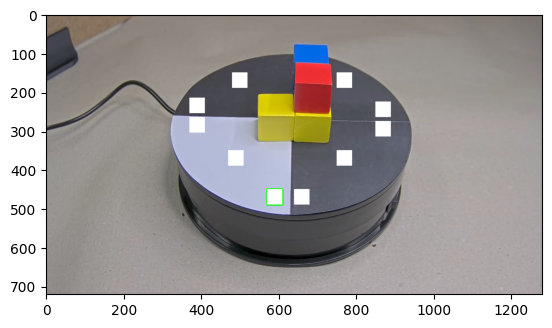

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('Bild1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

cv2.rectangle(img, (570,450), (610, 490), (0,255,0), 3)
roi_bot_bot_left = img[450:490, 570:610]
average_color_bot_bot_left = np.mean(roi_bot_bot_left, axis=(0 ,1))
        
print(average_color_bot_bot_left)

# Bottom bottom left
img[450:490, 570:610] = [255, 255, 255]

# Bottom middle left
img[350:390, 470:510] = [255, 255, 255]

# Bottom left left
img[265:305, 370:410] = [255, 255, 255]


# Bottom bottom right
img[450:490, 640:680] = [255, 255, 255]

# Bottom middle right
img[350:390, 750:790] = [255, 255, 255]

# Bottom right right
img[275:315, 850:890] = [255, 255, 255]



# Top middle left
img[150:190, 480:520] = [255, 255, 255]

# Top left left
img[215:255, 370:410] = [255, 255, 255]


# Top middle right
img[150:190, 750:790] = [255, 255, 255]

# Top right right
img[225:265, 850:890] = [255, 255, 255]


# img[270:310, 670:710] = [255, 255, 255]
# img[85:120, 580:620] = [255, 255, 255]
# img[85:120, 670:710] = [255, 255, 255]
plt.imshow(img)
plt.show()

# Code Erkennung Final

In [ ]:
import cv2
import numpy as np
from datetime import datetime
import time

__pos = 0

def open_camera_profile(ip_address, username, password, profile, screenshotName): # Open the camera
    cap = cv2.VideoCapture('rtsp://' +
            username + ':' +
            password +
            '@' + ip_address + '/axis-media/media.amp' + '?streamprofile=' + profile)
    if cap is None or not cap.isOpened():
        print('Warning: unable to open video source: ', ip_address)
        return None
    lower_white = np.array([155, 180, 120])
    upper_white = np.array([170 ,210, 144])
    
    not_white = np.array([140, 140, 100])
    
    lower_white_right = np.array([155, 185, 125])
    upper_white_right = np.array([180, 220, 160])
    while True:
        ret, frame = cap.read()
        hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
        
        # Bottom bottom left
        cv2.rectangle(frame, (570,450), (610, 490), (0,255,0), 3)
        roi_bot_bot_left = frame[450:490, 570:610]
        average_color_bot_bot_left = np.mean(roi_bot_bot_left, axis=(0 ,1))

        # Bottom middle left
        cv2.rectangle(frame, (470,350), (510, 390), (0,255,0), 3)
        roi_bot_mid_left = frame[350:390, 470:510]
        average_color_bot_mid_left = np.mean(roi_bot_mid_left, axis=(0 ,1))

        # Bottom left left
        cv2.rectangle(frame, (370,265), (410, 305), (0,255,0), 3)
        roi_bot_left_left = frame[265:305, 370:410]
        average_color_bot_left_left = np.mean(roi_bot_left_left, axis=(0 ,1))


        # Bottom bottom right
        cv2.rectangle(frame, (640,450), (680, 490), (0,255,0), 3)
        roi_bot_bot_right = frame[450:490, 640:680]
        average_color_bot_bot_right = np.mean(roi_bot_bot_right, axis=(0 ,1))

        # Bottom middle right
        cv2.rectangle(frame, (750,350), (790, 390), (0,255,0), 3)
        roi_bot_mid_right = frame[350:390, 750:790]
        average_color_bot_mid_right = np.mean(roi_bot_mid_right, axis=(0 ,1))

        # Bottom right right
        cv2.rectangle(frame, (850,275), (890, 315), (0,255,0), 3)
        roi_bot_right_right = frame[275:315, 850:890]
        average_color_bot_right_right = np.mean(roi_bot_right_right, axis=(0 ,1))


        # Top middle left
        cv2.rectangle(frame, (480,150), (520, 190), (0,255,0), 3)
        roi_top_mid_left = frame[150:190, 480:520]
        average_color_top_mid_left = np.mean(roi_top_mid_left, axis=(0 ,1))

        # Top left left
        cv2.rectangle(frame, (370,215), (410, 255), (0,255,0), 3)
        roi_top_left_left = frame[215:255, 370:410]
        average_color_top_left_left = np.mean(roi_top_left_left, axis=(0 ,1))


        # Top middle right
        cv2.rectangle(frame, (750,150), (790, 190), (0,255,0), 3)
        roi_top_mid_right = frame[150:190, 750:790]
        average_color_top_mid_right = np.mean(roi_top_mid_right, axis=(0 ,1))

        # Top right right
        cv2.rectangle(frame, (850,225), (890, 265), (0,255,0), 3)
        roi_top_right_right = frame[225:265, 850:890]
        average_color_top_right_right = np.mean(roi_top_right_right, axis=(0 ,1))


        if(average_color_bot_bot_left >= lower_white).all() and (average_color_bot_bot_left <= upper_white).all() and (average_color_bot_mid_left >= lower_white).all() and (average_color_bot_mid_left <= upper_white).all() and (average_color_bot_left_left >= lower_white).all() and (average_color_bot_left_left <= upper_white).all():
            cap.release()
            __pos = 1
            cv2.imwrite(screenshotName + ".png", frame)
            return True 
        
        if(average_color_bot_bot_right >= lower_white_right).all() and (average_color_bot_bot_right <= upper_white_right).all() and (average_color_bot_mid_right >= lower_white_right).all() and (average_color_bot_mid_right <= upper_white_right).all() and (average_color_bot_right_right >= lower_white_right).all() and (average_color_bot_right_right <= upper_white_right).all():
            cap.release()
            __pos = 2
            cv2.imwrite(screenshotName + ".png", frame)
            return True
        
        if(average_color_top_left_left >= lower_white).all() and (average_color_top_left_left <= upper_white).all() and (average_color_top_mid_left >= lower_white).all() and (average_color_top_mid_left <= upper_white).all() and (average_color_bot_left_left <= not_white).all():
            cap.release()
            __pos = 3
            cv2.imwrite(screenshotName + ".png", frame)
            return True 
        
        if(average_color_top_right_right >= lower_white_right).all() and (average_color_top_right_right <= upper_white_right).all() and (average_color_top_mid_right >= lower_white_right).all() and (average_color_top_mid_right <= upper_white_right).all():
            cap.release()
            cv2.imwrite(screenshotName + ".png", frame)
            __pos = 4
            return True 


        # Zur Entwicklung: Frame anzeigen
        cv2.imshow('frame',frame)
        
        if not ret:
            print('Warning: unable to read next frame')
            break

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
        #cv2.destroyAllWindows()

def writeScreenshot(ip_address, username, password, profile, screenshotName): 
    # Open the camera
    cap = cv2.VideoCapture('rtsp://' +
                            username + ':' +
                            password +
                            '@' + ip_address + '/axis-media/media.amp' + '?streamprofile=' + profile)
    if cap is None or not cap.isOpened():
        print('Warning: unable to open video source: ', ip_address) 
        return None
    ret, frame = cap.read()


    cv2.imwrite(screenshotName + ".png", frame)
    cv2.destroyAllWindows()
    print(str(screenshotName) + ".png erstellt.")

def getPosPlate():
    return __pos

while(True):
    open_camera_profile('147.88.48.131', 'pren', '463997','pren_profile_med', 'Screenshot1')
    print("now")
    time.sleep(12.2)
    print("now")
    writeScreenshot('147.88.48.131', 'pren', '463997','pren_profile_med', 'Screenshot2')
    getPosPlate()
    break

In [ ]:
from datetime import datetime
import time

# Example timestamp (replace this with your timestamp or time object)
timestamp = time.time()  # Example timestamp representing 2021-03-22 14:09:05 (Unix timestamp)

# Convert the timestamp to a datetime object
dt_object = datetime.fromtimestamp(timestamp)

# Format the datetime object as a string with desired components
formatted_string = dt_object.strftime("%Y-%m-%d-%H-%M-%S")

# Print the formatted string
print(formatted_string)
